In [ ]:
### 🧠 Objective:
#To analyze the sentiment of movie reviews and classify them as **positive** or **negative** using machine learning and text processing techniques.


### ⚙️ Problem Statement:
#With the rapid increase in online movie reviews, it becomes difficult for viewers to manually determine if a movie is good or bad.  
#This project aims to automate sentiment classification by building a model that understands the tone of reviews and labels them as *Positive* or *Negative*.


In [2]:
import pandas as pd

data = pd.read_csv("IMDB Dataset.csv")

data.head()
data.isnull().sum()
print("Number of rows and coloumns:", data.shape)
print("\n")
print("\n COloumn Names:",data.columns.tolist())
print("\nDataset Info:")
print(data.info())

print("\n Sentiment Distribution:")
print(data['sentiment'].value_counts())


Number of rows and coloumns: (50000, 2)



 COloumn Names: ['review', 'sentiment']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

 Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

print(data['review'][0])

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = text.translate(str.maketrans(' ', ' ',string.punctuation))

    text = re.sub(r'\d+', '', text)
    text = text.lower()

    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['clean_review'] = data['review'].apply(clean_text)
data[['review' , 'clean_review']].head()

data = data[data['clean_review'].str.strip().astype(bool)]
print("Remaining rows after cleaning:",len(data))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mgvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [3]:
# --- Import Libraries ---
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Download stopwords ---
nltk.download('stopwords')

# --- Load Dataset ---
# Make sure the CSV file is in the same folder as your notebook
df = pd.read_csv("IMDB Dataset.csv")

# --- Clean Text Function ---
def clean_text(text):
    text = re.sub(r"<.*?>", "", text)              # Remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)         # Keep only letters
    text = text.lower()                            # Lowercase
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

# --- Apply Cleaning ---
df['review'] = df['review'].apply(clean_text)

# --- Remove empty rows (if any) ---
df = df[df['review'].str.strip() != '']

print("✅ Cleaning complete. Remaining rows:", len(df))

# --- Encode sentiment labels ---
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# --- Split data ---
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

# --- TF-IDF Vectorization ---
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("✅ TF-IDF vectorization complete!")
print("Shape of training data:", X_train_tfidf.shape)
print("Shape of test data:", X_test_tfidf.shape)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mgvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Cleaning complete. Remaining rows: 50000
Training samples: 40000
Testing samples: 10000
✅ TF-IDF vectorization complete!
Shape of training data: (40000, 5000)
Shape of test data: (10000, 5000)


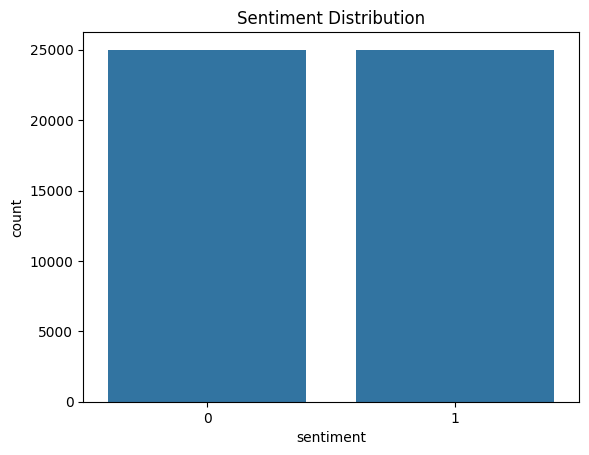

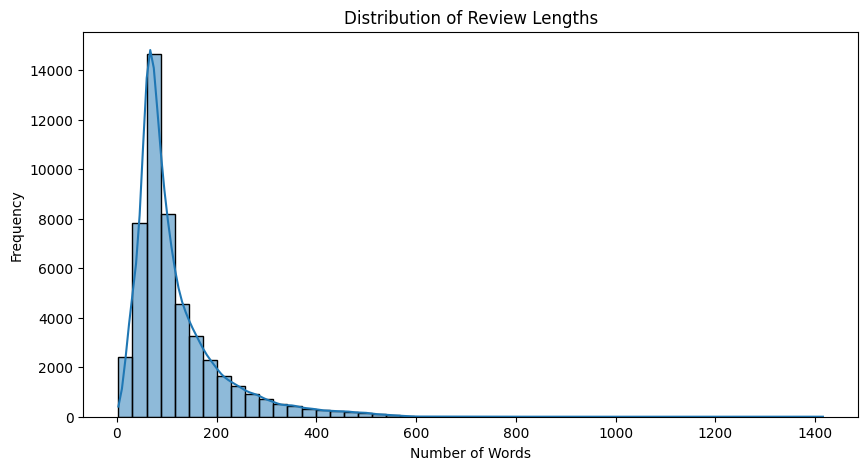

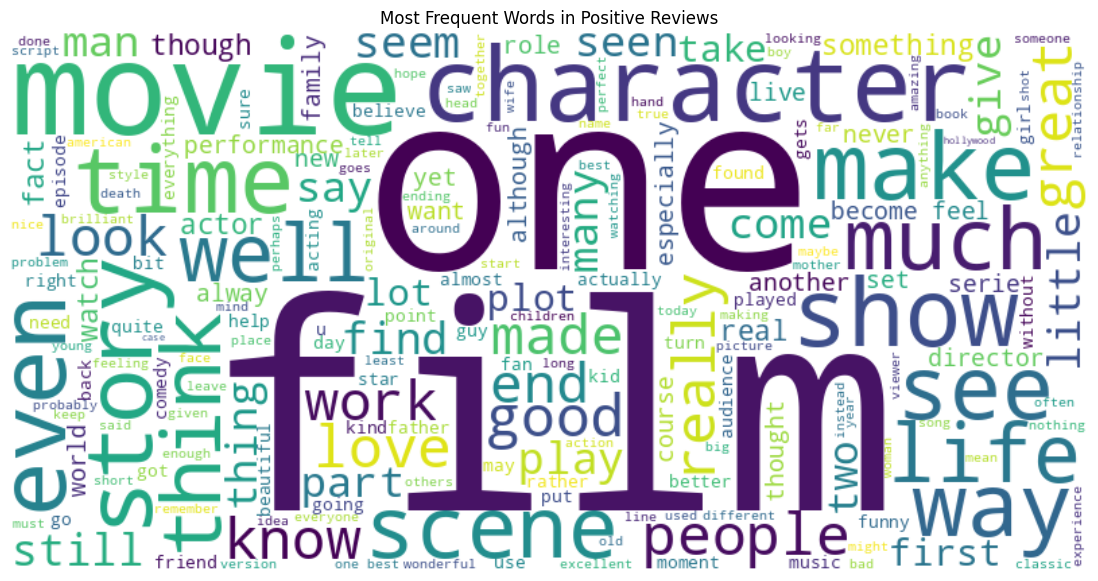

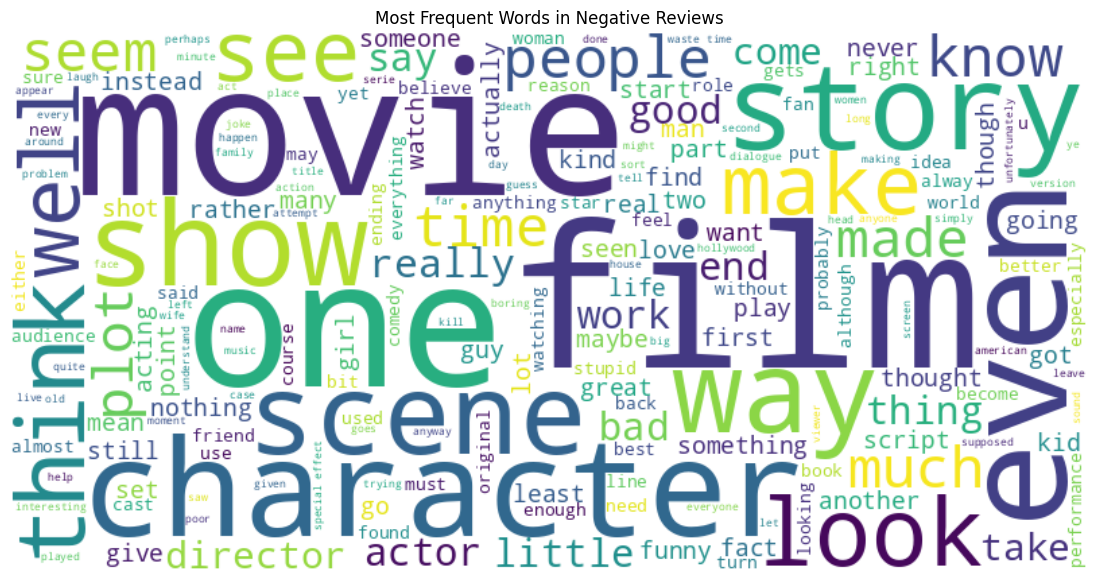

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

df['review_length'] = df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

positive_text = " ".join(df[df['sentiment'] == 1]['review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Positive Reviews")
plt.show()

negative_text = " ".join(df[df['sentiment'] == 0]['review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Negative Reviews")
plt.show()



In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)
y_pred_log = log_model.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Logistic Regression Accuracy: 0.8923
[[4354  607]
 [ 470 4569]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Naive Bayes Accuracy: 0.8577
[[4173  788]
 [ 635 4404]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\mgvin\AppData\Local\Temp\ipykernel_8524\1576732827.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


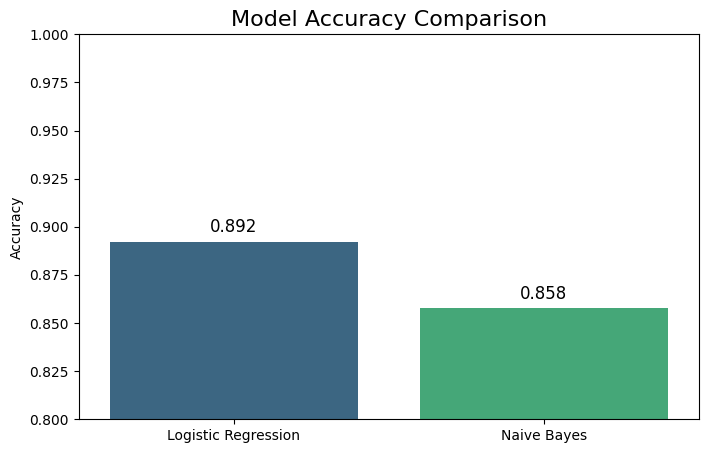

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

models = ['Logistic Regression', 'Naive Bayes']
accuracies = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_nb)]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy")
plt.ylim(0.8,1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontsize=12)
plt.show()


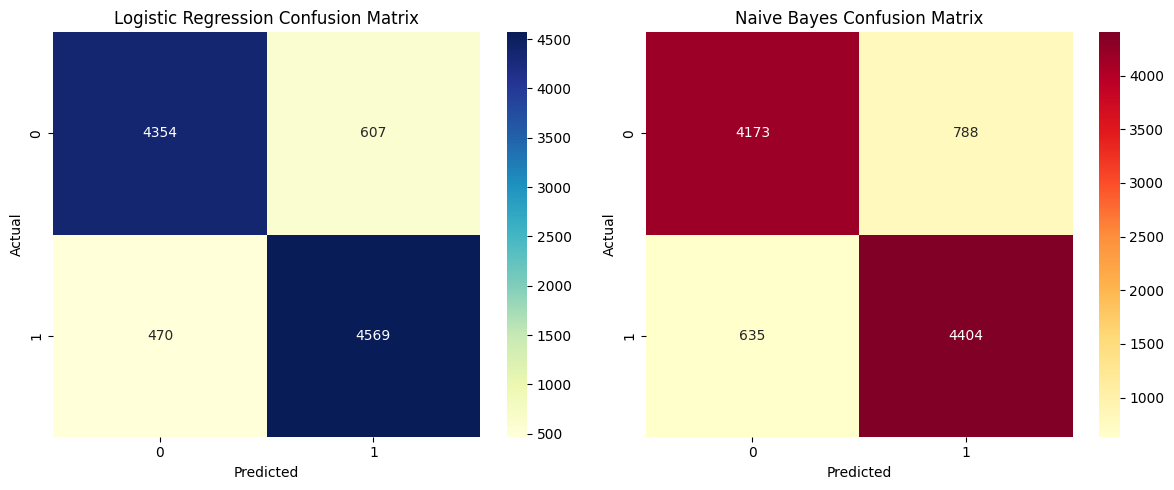

In [23]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='YlOrRd')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


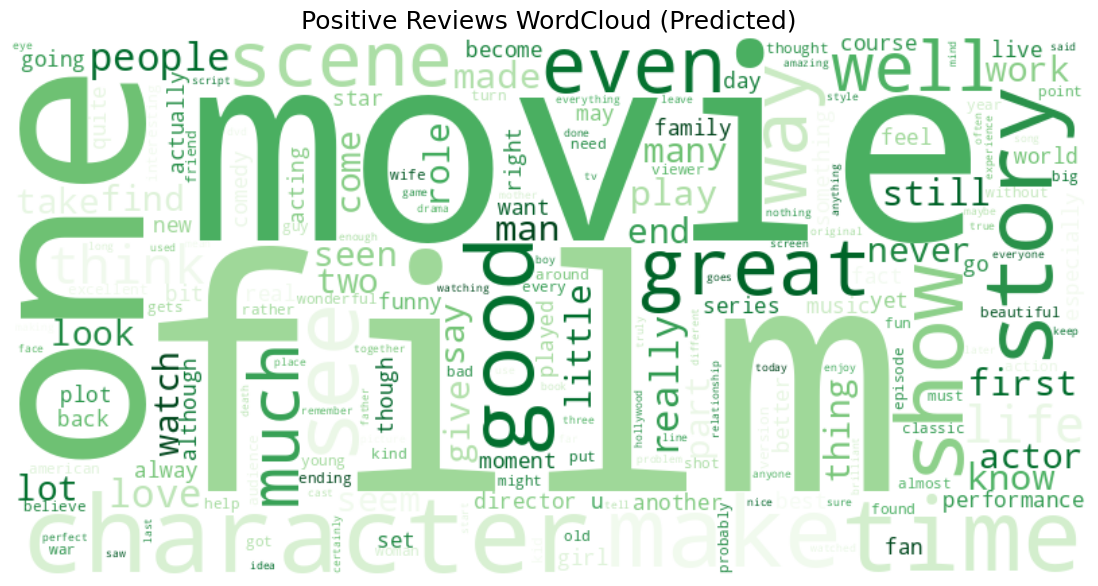

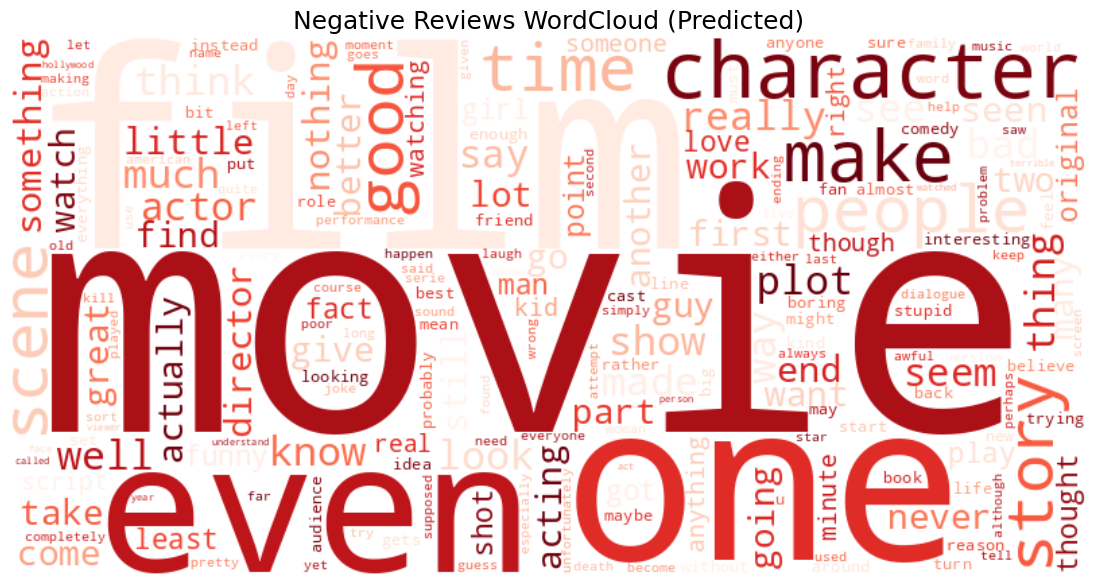

In [6]:
from wordcloud import WordCloud

positive_pred_text = " ".join([X_test.iloc[i] for i in range(len(y_test)) if y_pred_log[i] == 1])
negative_pred_text = " ".join([X_test.iloc[i] for i in range(len(y_test)) if y_pred_log[i] == 0])

plt.figure(figsize=(15,7))
wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_pred_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud (Predicted)", fontsize=18)
plt.show()

plt.figure(figsize=(15,7))
wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_pred_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud (Predicted)", fontsize=18)
plt.show()


C:\Users\mgvin\AppData\Local\Temp\ipykernel_16888\229371851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=color)


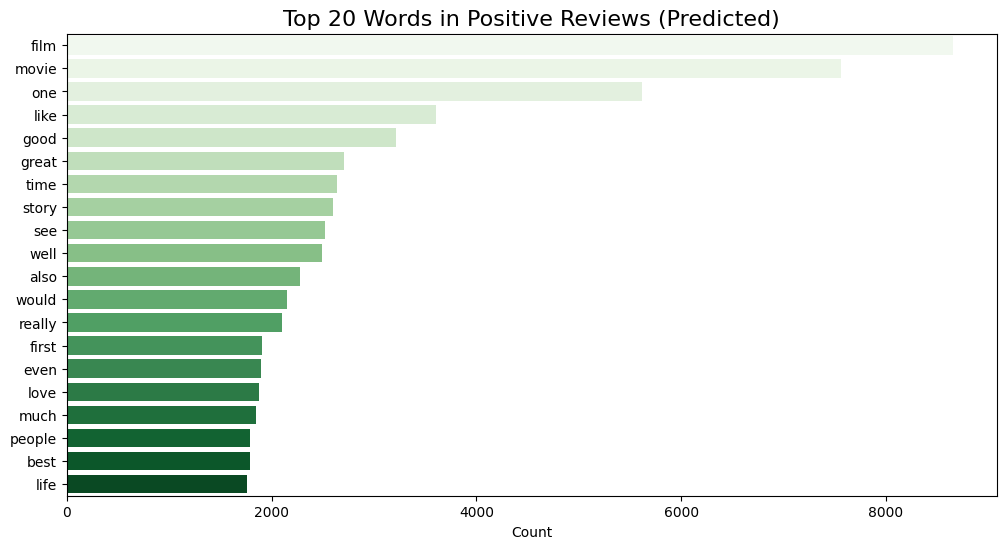

C:\Users\mgvin\AppData\Local\Temp\ipykernel_16888\229371851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=color)


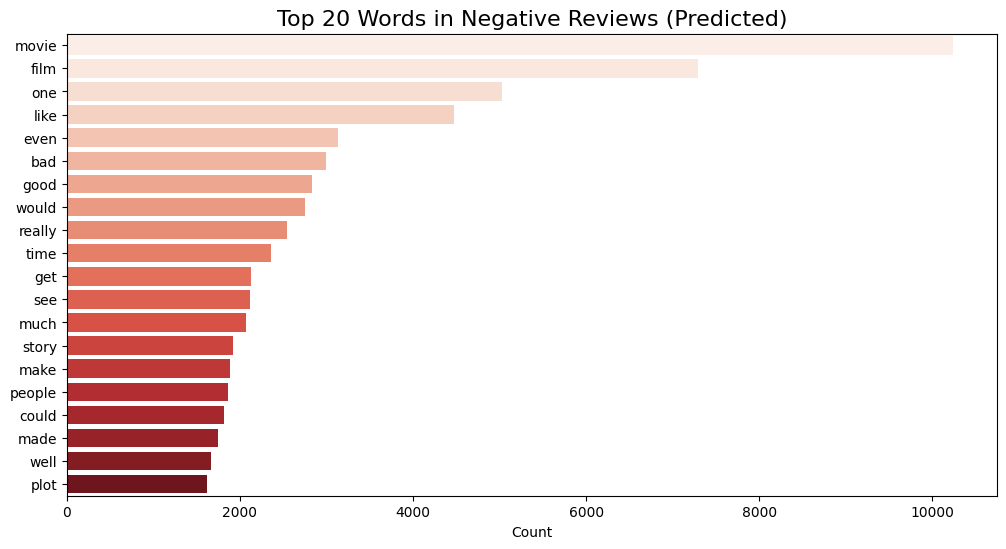

In [25]:
from collections import Counter

def plot_top_words(text, top_n=20, color='blue', title='Top Words'):
    words = text.split()
    counter = Counter(words)
    common_words = counter.most_common(top_n)
    words, counts = zip(*common_words)
    plt.figure(figsize=(12,6))
    sns.barplot(x=list(counts), y=list(words), palette=color)
    plt.title(title, fontsize=16)
    plt.xlabel("Count")
    plt.show()

plot_top_words(positive_pred_text, color='Greens', title='Top 20 Words in Positive Reviews (Predicted)')
plot_top_words(negative_pred_text, color='Reds', title='Top 20 Words in Negative Reviews (Predicted)')


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def predict_sentiment(review):
    vect = vectorizer.transform([review])
    pred = log_model.predict(vect)
    return "Positive 😊" if pred[0] == 1 else "Negative 😞"

text_box = widgets.Textarea(
    value='',
    placeholder='Type your movie review here...',
    description='Review:',
    layout=widgets.Layout(width='80%', height='100px')
)

button = widgets.Button(
    description='Predict Sentiment',
    button_style='success'
)

output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output()
        review = text_box.value
        if review.strip() == "":
            print("⚠️ Please enter a review!")
        else:
            result = predict_sentiment(review)
            print(f"Predicted Sentiment: {result}")

button.on_click(on_button_click)
display(text_box, button, output)


Textarea(value='', description='Review:', layout=Layout(height='100px', width='80%'), placeholder='Type your m…

Button(button_style='success', description='Predict Sentiment', style=ButtonStyle())

Output()